In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv", index_col=0)
print(df.shape)
df.head()

(16598, 9)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [3]:
df.groupby("Year").count()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,,,,,
0.0,3,3,3,3,3,3,3,3
1.0,2,2,2,2,2,2,2,2
2.0,3,3,3,3,3,3,3,3
3.0,7,7,7,7,7,7,7,7
4.0,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...
2014.0,580,580,580,578,580,580,580,580
2015.0,609,609,606,609,609,609,609,609
2016.0,339,339,339,337,339,339,339,339


In [4]:
df.isna().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [5]:
df.groupby("Platform")["Year"].mean()

Platform
2600    1982.137931
3DO     1994.666667
3DS     1997.062000
DC      1999.942308
DS      1993.198781
GB      1975.340206
GBA     1993.346486
GC      1992.330258
GEN     1993.037037
GG      1992.000000
N64     1986.506329
NES     1967.765306
NG      1994.500000
PC      1996.047720
PCFX    1996.000000
PS      1986.650126
PS2     1993.300423
PS3     1998.549847
PS4     1997.148810
PSP     1997.025898
PSV     1989.762136
SAT     1963.080925
SCD     1993.833333
SNES    1969.995816
TG16    1995.000000
WS      2000.000000
Wii     2001.210853
WiiU    2013.594406
X360    2001.785425
XB      1991.183064
XOne    2014.788732
Name: Year, dtype: float64

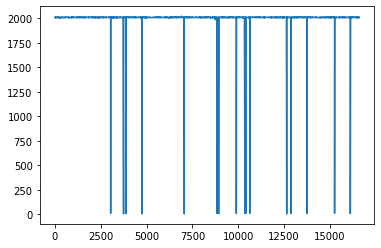

In [6]:
plt.plot(df[df["Platform"] == "DS"]["Year"])

In [7]:
year_of_platform_median = df.groupby("Platform")["Year"].median()
year_of_platform_median

Platform
2600    1982.0
3DO     1995.0
3DS     2013.0
DC      2000.0
DS      2008.0
GB      1997.0
GBA     2003.0
GC      2003.0
GEN     1993.0
GG      1992.0
N64     1999.0
NES     1986.5
NG      1994.5
PC      2009.0
PCFX    1996.0
PS      1998.0
PS2     2004.0
PS3     2011.0
PS4     2015.0
PSP     2009.0
PSV     2014.0
SAT     1996.0
SCD     1994.0
SNES    1994.0
TG16    1995.0
WS      2000.0
Wii     2009.0
WiiU    2013.0
X360    2010.0
XB      2004.0
XOne    2015.0
Name: Year, dtype: float64

In [8]:
np_Year = np.array(df["Year"])
np_Platform = np.array(df["Platform"])
dict_median = year_of_platform_median.to_dict()
np_Platfrom_median = np.array([dict_median[x] for x in np_Platform])

In [9]:
sum(np.isnan(np_Year))

271

In [10]:
np.nan_to_num(np_Year, 0)
np_Year = np.where(np_Platfrom_median - np_Year > 20 , np_Platfrom_median, np_Year)

In [11]:
sum(np.isnan(np_Year))

0

In [12]:
'''
for idx, (platform, year) in df[["Platform", "Year"]].iterrows():        
    if year == None or year_of_platform_median.loc[platform].values - year > 30:
        df.iloc[idx-1, df.columns.get_loc("Year")] = year_of_platform_median.loc[platform].values    
'''

    

'\nfor idx, (platform, year) in df[["Platform", "Year"]].iterrows():        \n    if year == None or year_of_platform_median.loc[platform].values - year > 30:\n        df.iloc[idx-1, df.columns.get_loc("Year")] = year_of_platform_median.loc[platform].values    \n'

In [13]:
df["Year"] = np_Year

In [14]:
df.groupby("Platform")[["Year"]].mean()

,Year
Platform,
2600,1982.120301
3DO,1994.666667
3DS,2013.055010
DC,1999.942308
DS,2008.205733
GB,1995.938776
GBA,2003.200730
GC,2003.390288
GEN,1993.037037


In [15]:
np_NA_Sales = np.array(df['NA_Sales'])
np_EU_Sales = np.array(df['EU_Sales'])
np_JP_Sales = np.array(df['JP_Sales'])
np_Other_Sales = np.array(df['Other_Sales'])

In [16]:
np_NA_Sales.shape

(16598,)

In [17]:
np_NA_Sales

array(['0.04', '0.17', '0', ..., '0.44', '0.05', '0'], dtype=object)

In [18]:
def convert_to_numeric(array):
    for idx, val in enumerate(array):
        if val[-1] == 'K':
            array[idx] = float(val[:-1]) * 1e3
        elif val[-1] == 'M':
            array[idx] = float(val[:-1]) * 1e6
        elif val[-1] == 'B':
            array[idx] = float(val[:-1]) * 1e9
        else:
            array[idx] = float(val)
        
    return array.astype(np.float64)

In [19]:
df['NA_Sales'] = convert_to_numeric(np_NA_Sales)
df['EU_Sales'] = convert_to_numeric(np_EU_Sales)
df['JP_Sales'] = convert_to_numeric(np_JP_Sales)
df['Other_Sales'] = convert_to_numeric(np_Other_Sales)

In [20]:
df.isna().sum()

Name            0
Platform        0
Year            0
Genre          50
Publisher      58
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16598 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.3+ MB


In [22]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16598.000000,1.659800e+04,1.659800e+04,1.659800e+04,16598.000000
mean,2006.396403,4.900248e+03,2.099193e+03,1.202631e+03,453.114244
std,5.841467,1.280374e+05,5.250814e+04,4.466015e+04,10148.004639
min,1980.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2003.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,2007.000000,8.000000e-02,2.000000e-02,0.000000e+00,0.010000
75%,2010.000000,2.500000e-01,1.100000e-01,4.000000e-02,0.040000
max,2020.000000,9.630000e+06,2.930000e+06,3.150000e+06,590000.000000


In [23]:
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df["JP_Sales"] + df["Other_Sales"]
df['Total_Sales']

1        0.04
2        0.18
3        0.02
4        0.04
5        0.25
         ... 
16594    0.20
16595    0.01
16596    0.79
16597    0.38
16598    0.17
Name: Total_Sales, Length: 16598, dtype: float64

In [24]:
df.loc[df["Genre"].isna() == True]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
51,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05,0.70
409,NBA Ballers,XB,2004.0,NaN,Midway Games,0.37,0.11,0.00,0.02,0.50
1329,NFL Street,XB,2004.0,NaN,Electronic Arts,0.49,0.15,0.00,0.02,0.66
1583,SingStar Singalong With Disney,PS2,2008.0,NaN,Sony Computer Entertainment,0.00,0.04,0.00,0.57,0.61
1972,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5170000.00,4.05,4.34,0.79,5170009.18
2044,NASCAR Racing,PS,1996.0,NaN,Pioneer LDC,0.23,0.16,0.00,0.03,0.42
2498,Jurassic Park III: Island Attack,GBA,2001.0,NaN,Konami Digital Entertainment,0.13,0.05,0.00,0.00,0.18
3354,The Godfather: Dons Edition,PS3,2007.0,NaN,Electronic Arts,0.25,0.02,0.00,0.03,0.30
3364,Ski-Doo Snowmobile Challenge,X360,2009.0,NaN,Valcon Games,0.03,0.00,0.00,0.00,0.03
3471,Batman Beyond: Return of the Joker,N64,2000.0,NaN,Ubisoft,0.07,0.02,0.00,0.00,0.09


In [25]:
df.loc[df["Publisher"].isna() == True]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
273,UK Truck Simulator,PC,2010.0,Simulation,NaN,0.00,0.03,0.00,0.00,0.03
1314,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.17,0.06,0.00,0.00,0.23
1561,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004.0,Misc,NaN,0.12,0.04,0.00,0.00,0.16
1790,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.16,0.06,0.00,0.00,0.22
1880,Monster Hunter Frontier Online,PS3,2011.0,Role-Playing,NaN,0.00,0.00,0.05,0.00,0.05
1962,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64
2071,World of Tanks,X360,2010.0,Shooter,NaN,0.00,0.03,0.00,0.00,0.03
2971,Chou Soujuu Mecha MG,DS,2008.0,Simulation,NaN,0.00,0.00,0.06,0.00,0.06
3185,Action Man-Operation Extreme,PS,1998.0,Action,NaN,0.05,0.03,0.00,0.01,0.09
3413,Dance with Devils,PSV,2016.0,Action,NaN,0.00,0.00,0.01,0.00,0.01


In [26]:
(len(df.loc[df["Genre"].isna() == True]) + len(df.loc[df["Publisher"].isna() == True]))/len(df)

0.00650680804916255

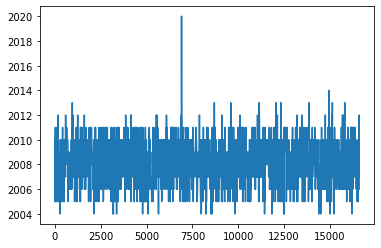

In [27]:
plt.plot(df[df["Platform"] == "DS"]["Year"])

In [28]:
np.argmax(df[df["Platform"] == "DS"]["Year"])

914

In [29]:
df[df["Platform"] == "DS"].iloc[np.argmax(df[df["Platform"] == "DS"]["Year"])]

Name           Imagine: Makeup Artist
Platform                           DS
Year                             2020
Genre                      Simulation
Publisher                     Ubisoft
NA_Sales                         0.27
EU_Sales                            0
JP_Sales                            0
Other_Sales                      0.02
Total_Sales                      0.29
Name: 6907, dtype: object

In [30]:
df[df["Platform"] == "DS"]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00,0.14
14,The Professor's Brain Trainer: Logic,DS,2005.0,Puzzle,505 Games,0.02,0.00,0.00,0.00,0.02
15,Zoids Dash,DS,2006.0,Role-Playing,Tomy Corporation,0.00,0.00,0.02,0.00,0.02
...,...,...,...,...,...,...,...,...,...,...
16555,ASH: Archaic Sealed Heat,DS,2007.0,Role-Playing,Nintendo,0.00,0.00,0.12,0.00,0.12
16563,Sherlock Holmes: The Mystery of the Mummy,DS,2009.0,Adventure,Focus Home Interactive,0.06,0.30,0.00,0.04,0.40
16573,GoldenEye 007 (2010),DS,2010.0,Action,Activision,0.11,0.03,0.00,0.01,0.15
16581,Captain Morgane and the Golden Turtle,DS,2012.0,Adventure,Reef Entertainment,0.00,0.03,0.00,0.00,0.03


In [31]:
df.groupby('Year').count()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Year,,,,,,,,,
1980.0,9,9,8,9,9,9,9,9,9
1981.0,46,46,46,46,46,46,46,46,46
1982.0,53,53,53,53,53,53,53,53,53
1983.0,17,17,17,17,17,17,17,17,17
1984.0,14,14,14,14,14,14,14,14,14
1985.0,12,12,12,12,12,12,12,12,12
1986.0,20,20,20,20,20,20,20,20,20
1986.5,1,1,1,1,1,1,1,1,1
1987.0,16,16,16,16,16,16,16,16,16


In [32]:
df.dropna(axis=0).groupby("Year").count()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Year,,,,,,,,,
1980.0,8,8,8,8,8,8,8,8,8
1981.0,46,46,46,46,46,46,46,46,46
1982.0,53,53,53,53,53,53,53,53,53
1983.0,17,17,17,17,17,17,17,17,17
1984.0,14,14,14,14,14,14,14,14,14
1985.0,12,12,12,12,12,12,12,12,12
1986.0,20,20,20,20,20,20,20,20,20
1986.5,1,1,1,1,1,1,1,1,1
1987.0,16,16,16,16,16,16,16,16,16


In [33]:
original = np.array(df.groupby('Year').count()["Name"])
drop_row = np.array(df.dropna(axis=0).groupby("Year").count()["Name"])

In [34]:
original - drop_row

array([ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  5,  2,  1,  2,  3,  2, 25,  7,  3,  7, 10,  7,  9,  9,  5,
        2,  2,  3,  2,  0,  0], dtype=int64)

In [35]:
original

array([   9,   46,   53,   17,   14,   12,   20,    1,   16,   14,   17,
         16,   41,   43,   60,  123,  215,  263,  289,  390,  343,  346,
        480,  826,  800,  831,  937, 1001, 1199, 1465, 1509, 1287, 1162,
        655,  557,  586,  612,  339,    3,    1], dtype=int64)

In [36]:
np.around((original - drop_row)/original, 3)

array([0.111, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.004,
       0.   , 0.013, 0.006, 0.003, 0.004, 0.004, 0.002, 0.03 , 0.007,
       0.003, 0.006, 0.007, 0.005, 0.007, 0.008, 0.008, 0.004, 0.003,
       0.005, 0.006, 0.   , 0.   ])

In [37]:
print(df.shape)
df = df.dropna(axis=0)

(16598, 10)


In [38]:
df.shape

(16490, 10)

In [39]:
genre_list = list(df["Genre"].value_counts().index)
genre_list

['Action',
 'Sports',
 'Misc',
 'Role-Playing',
 'Shooter',
 'Adventure',
 'Racing',
 'Platform',
 'Simulation',
 'Fighting',
 'Strategy',
 'Puzzle']

In [40]:
 df.groupby("Year").sum()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Year,,,,,
1980.0,10.13,0.64,0.00,0.11,10.88
1981.0,33.40,110001.85,0.00,0.32,110035.57
1982.0,350036.39,2.26,0.00,0.38,350039.03
1983.0,7.76,0.80,8.10,0.14,16.80
1984.0,33.28,2.10,14.27,0.70,50.35
1985.0,460033.27,4.71,14.54,0.91,460053.43
1986.0,12.50,2.84,18.76,1.93,36.03
1986.5,0.00,0.00,1.05,0.00,1.05
1987.0,8.46,1.41,11.63,0.20,21.70


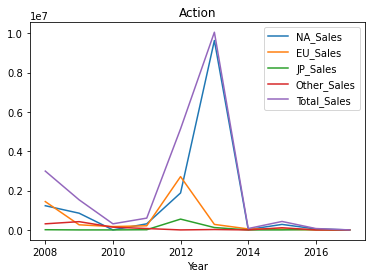

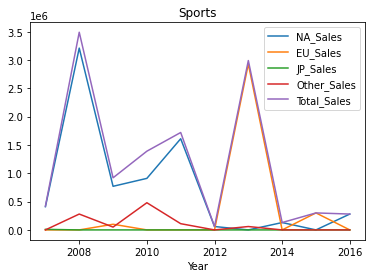

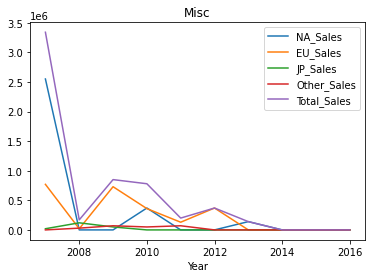

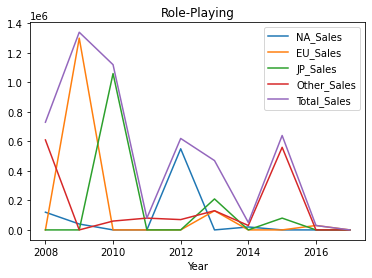

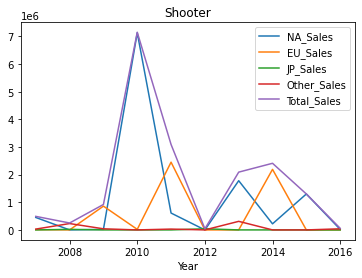

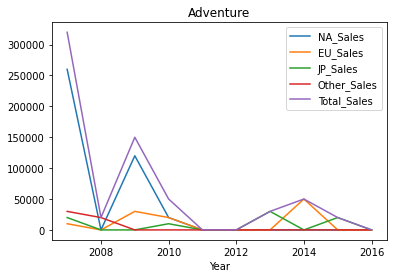

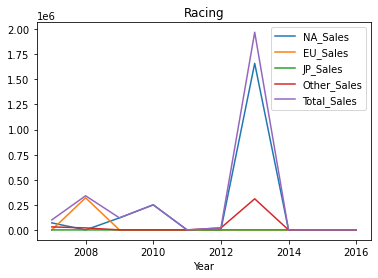

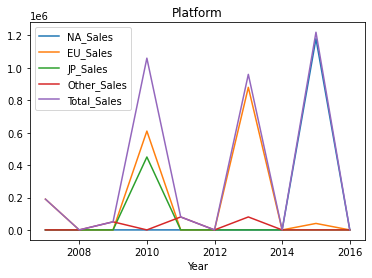

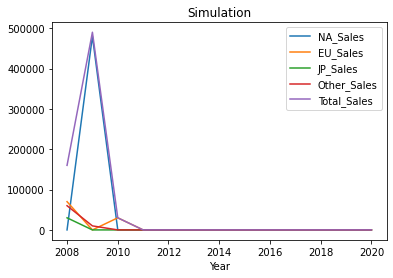

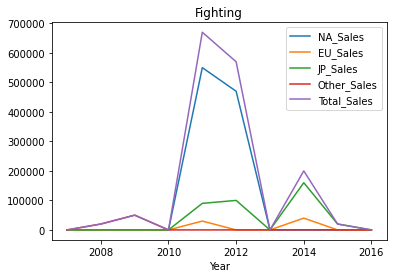

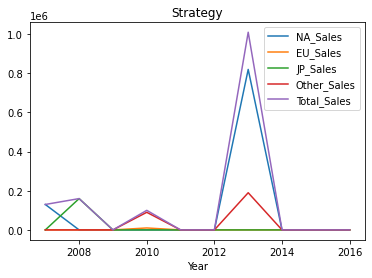

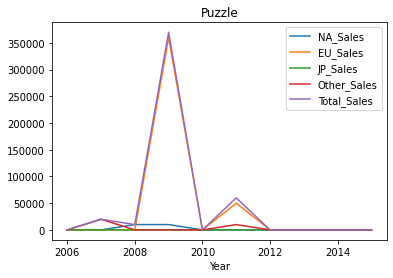

In [41]:
for genre in genre_list:
    sales_of_genre = df.loc[df["Genre"]== genre].groupby("Year").sum()
    sales_of_genre.iloc[-10:].plot(title=genre)

<AxesSubplot:ylabel='Total_Sales'>

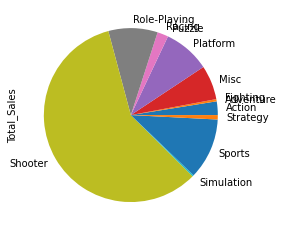

In [42]:
year_list = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
df.loc[df["Year"]==2010].groupby("Genre").sum()["Total_Sales"].plot.pie()

In [45]:
sales_of_year["Total_Sales"]

Genre
Action           310120.19
Adventure         50016.52
Fighting             15.38
Misc             780090.22
Platform        1060030.92
Puzzle               11.29
Racing           250035.55
Role-Playing    1120060.63
Shooter         7150072.97
Simulation        30022.21
Sports          1390092.30
Strategy         100013.94
Name: Total_Sales, dtype: float64

In [76]:
sales_of_year["Total_Sales"]

Genre
Action          0.01
Role-Playing    0.04
Name: Total_Sales, dtype: float64

In [98]:
sales_of_year["Total_Sales"].index

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object', name='Genre')

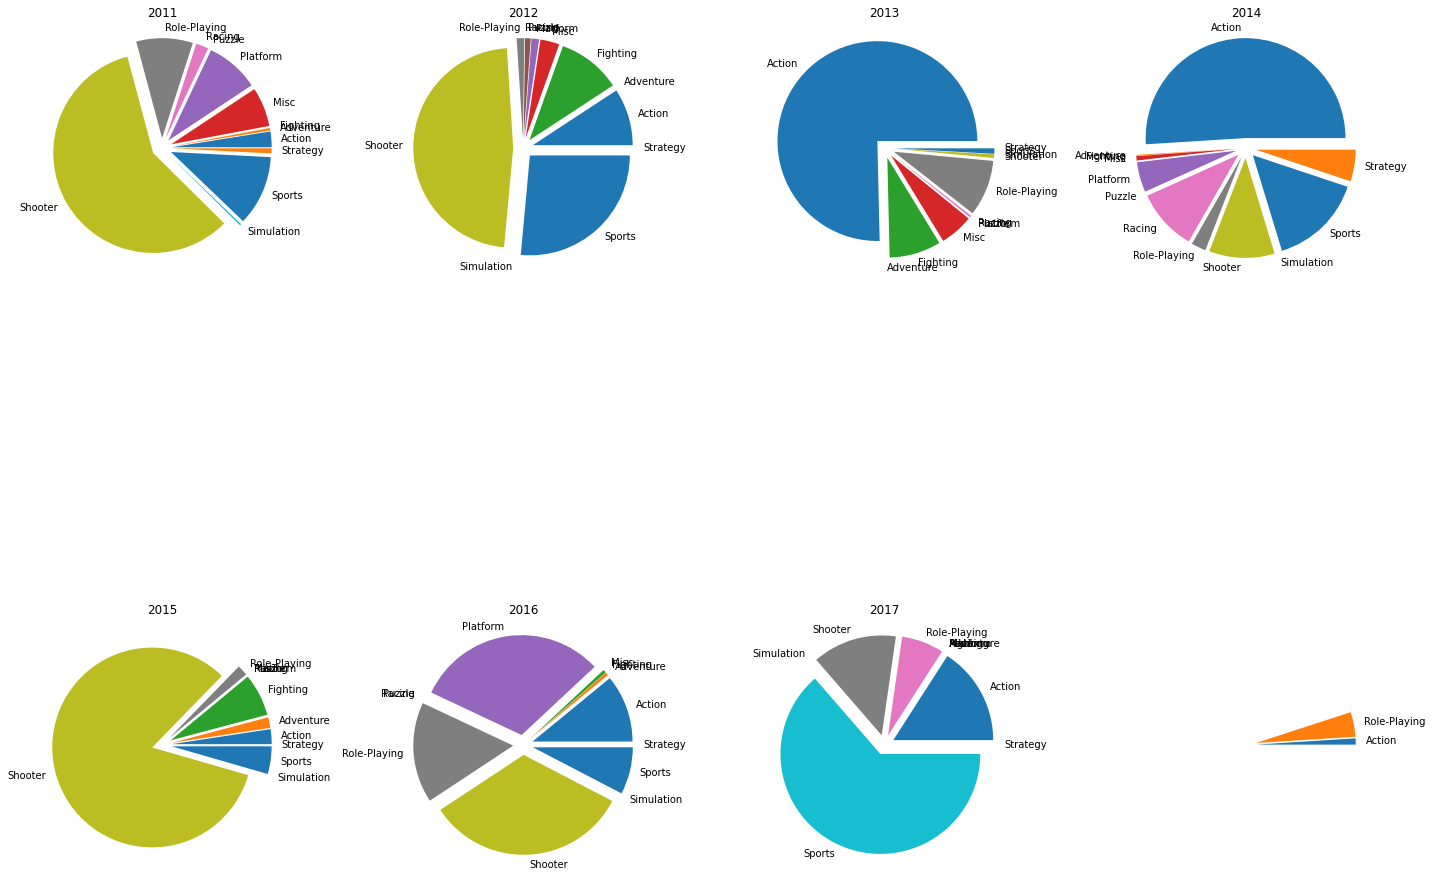

In [57]:
plt.figure(figsize=(20, 20))
for idx, year in enumerate(year_list):
    sales_of_year = df.loc[df["Year"]==year].groupby("Genre").sum()   
    sales_of_year["Total_Sales"]
    plt.title(year)
    plt.subplot(2, 4, (idx+1))
    plt.pie(sales_of_year["Total_Sales"], labels=sales_of_year["Total_Sales"].index, explode=[0.1 for _ in range(len(sales_of_year))]);

plt.tight_layout()
plt.show()